In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [515]:
data = pd.read_csv("PythonMachineLearning/Datasets/Datasets/house_prices.csv")
#data = pd.read_csv("machine-learning-ex1/ex1/ex1data1.txt")

In [518]:
size = data['sqft_living']
price = data['price']

x  = np.array(size).reshape(-1,1)
y  = np.array(price).reshape(-1,1)

model = LinearRegression()
model.fit(x,y)

model_mse = mean_squared_error(x,y)
print("model_MSE : ", math.sqrt(model_mse))
print("model_coef", model.coef_[0])
print("model_Intercept", model.intercept_[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

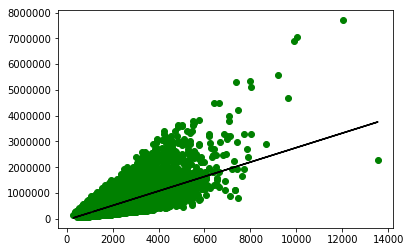

In [520]:
plt.scatter(x,y, color = 'green')
plt.plot(x,model.predict(x), color = 'black')
plt.show()

In [ ]:
## Andrew NG Course Uni Variate Linear Regression Matlab to Python

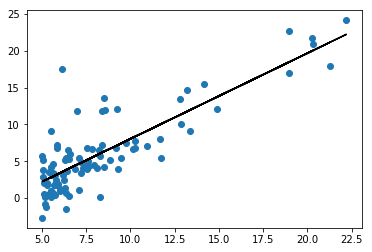

In [490]:
data2 = pd.read_csv("machine-learning-ex1/ex1/ex1data1.txt")
X = data2.drop(['y'],axis=1)
Y = data2['y']
plt.scatter(X,Y)
plt.plot(X,-3.6 + 1.1641*X, color = 'black')
plt.show()

In [482]:
X = np.array(X).reshape(X.shape[0],X.shape[1])
Y = np.array(Y).reshape(Y.shape[0],1)

In [483]:
A = np.ones((X.shape[0],X.shape[1]+1))
A[:,1] = X[:,0]

In [488]:
theta = np.zeros((A.shape[1],1))
alpha = 0.0001
num_iters = 1500

Theta Optimal : [[-3.60781668]
 [ 1.16410452]]


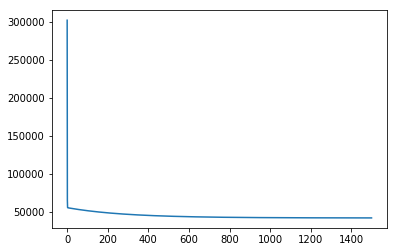

In [489]:
t,J = gradientDescentMulti(A, Y, theta, alpha, num_iters)
print("Theta Optimal :", t)
plt.plot(range(num_iters),J)
plt.show()

In [ ]:
## Andrew NG Course Multi Variate Linear Regression Matlab to Python

In [498]:
data3 = pd.read_csv("machine-learning-ex1/ex1/ex1data2.txt")
X = data3.drop(['y'],axis=1)
Y = data3['y']

In [499]:
X = np.array(X).reshape(X.shape[0],X.shape[1])
Y = np.array(Y).reshape(Y.shape[0],1)

In [500]:
def featureNorm(X):
    A = np.ones((X.shape[0],X.shape[1]+1))
    for i in range(X.shape[1]):
        
        m = sum(X[:,i])/X.shape[0]
        std = max(X[:,i]) - min(X[:,i])
        
        A[:,i+1] = (X[:,i] - m)/std
    
    return A

In [501]:
X = featureNorm(X)

In [505]:
theta = np.zeros((X.shape[1],1))
alpha = 0.01
num_iters = 1000

In [506]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    
    m = len(Y)
    J_history = np.zeros((num_iters, 1));
    
    for i in range(num_iters):
        
        th = theta - alpha*(((X@theta - Y).T)@X).T
        
        J_history[i] = sum((X@theta - Y)**2)/2*m
        
        theta = th
        
    return theta, J_history
        

Theta Optimal : [[340412.65957447]
 [504727.75445707]
 [-34887.62288132]]


array([4.51360576e+12])

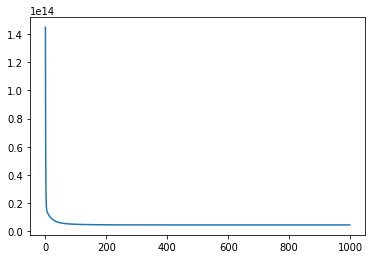

In [507]:
t,J = gradientDescentMulti(X, Y, theta, alpha, num_iters)

print("Theta Optimal :", t)
plt.plot(range(num_iters),J)
J[-1]